# 1) Imports

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from os import walk
from os.path import join, exists

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, OPTICS

import tensorflow
from tensorflow.keras.preprocessing import image

# 2) Carregar dataset

In [24]:
dataset = pd.read_feather('train_com_imagens.feather')
dataset = dataset.sample(frac=1)
dataset

,id,class,segmentation,image
5500,case129_day0_slice_0106,small_bowel,39735 2 40092 20 40444 32 40797 42 41149 55 41...,.\train\case129\case129_day0\scans\slice_0106_...
73663,case108_day0_slice_0139,small_bowel,None,.\train\case108\case108_day0\scans\slice_0139_...
33308,case134_day21_slice_0047,stomach,35117 17 35474 22 35832 26 36191 29 36550 31 3...,.\train\case134\case134_day21\scans\slice_0047...
325,case123_day20_slice_0109,small_bowel,17464 4 17728 8 17992 11 18007 5 18253 26 1851...,.\train\case123\case123_day20\scans\slice_0109...
59038,case24_day25_slice_0128,small_bowel,None,.\train\case24\case24_day25\scans\slice_0128_2...
...,...,...,...,...
66178,case111_day0_slice_0060,small_bowel,None,.\train\case111\case111_day0\scans\slice_0060_...
7288,case139_day16_slice_0126,small_bowel,None,.\train\case139\case139_day16\scans\slice_0126...
52858,case7_day0_slice_0084,small_bowel,None,.\train\case7\case7_day0\scans\slice_0084_266_...
52030,case101_day22_slice_0096,small_bowel,25685 8 25950 11 25977 6 26215 13 26242 9 2648...,.\train\case101\case101_day22\scans\slice_0096...


# 3) Clusterizar imagens p/ gerar exemplos de teste

In [196]:
distancia_vizinho = 1
n_vizinhos = 5

def new_cluster_model():
	return DBSCAN(
		eps=distancia_vizinho,
		min_samples=n_vizinhos,
		n_jobs=-1
	)

In [197]:
largura, altura = 100, 100


class Counter:
    _count = 0
    @staticmethod
    def get():
        Counter._count += 1
        return Counter._count
    
    @staticmethod
    def reset():
        Counter._count = 0


cluster_model = new_cluster_model()

def clustering(img_path):
    img = image.load_img(
        img_path,
        target_size=(largura, altura),
        color_mode='grayscale'
    )

    # Para realizar o clustering de uma imagem
    # Precisa de uma matriz das posicoes + uma dimensao para cores
    image_as_arr = image.img_to_array(img).reshape(largura * altura, 1)

    print(Counter.get(), end=', ')
    
    return cluster_model.fit_predict(image_as_arr)

In [198]:
# Limitar os dados por questão de tempo
# limite_dados = 10000
limite_dados = 100

df_dados = pd.concat([
	dataset[dataset['class'] == 'stomach'].sample(limite_dados),
	# dataset[dataset['class'] == 'small_bowel'].sample(limite_dados),
	# dataset[dataset['class'] == 'large_bowel'].sample(limite_dados),
])

df_dados['class'].value_counts()

df_dados['clusters'] = df_dados['image'].apply(clustering)
df_dados.head()

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

,id,class,segmentation,image,clusters
69674,case136_day0_slice_0137,stomach,None,.\train\case136\case136_day0\scans\slice_0137_...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
109535,case80_day10_slice_0032,stomach,None,.\train\case80\case80_day10\scans\slice_0032_2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
66722,case89_day19_slice_0017,stomach,None,.\train\case89\case89_day19\scans\slice_0017_3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22955,case114_day0_slice_0084,stomach,None,.\train\case114\case114_day0\scans\slice_0084_...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
48968,case147_day18_slice_0083,stomach,22474 5 22739 7 23004 9 23269 10 23533 13 2379...,.\train\case147\case147_day18\scans\slice_0083...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Visualização

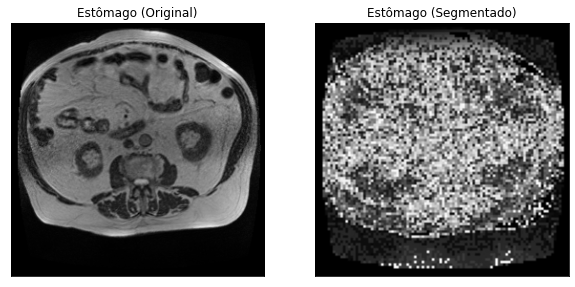

In [209]:
linha = df_dados.sample(n=1).iloc[0]

fig = plt.figure(figsize=(10, 10))
fig.patch.set_alpha(1)

nomes = {
	'stomach': 'Estômago',
	'large_bowel': 'Intestino Grosso',
	'small_bowel': 'Intestino Delgado',
}

ax = plt.subplot(1, 2, 1)
ax.imshow(plt.imread(linha['image']), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(nomes[linha['class']] + ' (Original)')

ax = plt.subplot(1, 2, 2)
ax.imshow(linha['clusters'].reshape(largura, altura), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(nomes[linha['class']] + ' (Segmentado)')
plt.show()

In [65]:
df_dados.reset_index().drop(columns=['index']).to_feather('train_imagens_clusters.feather')